In [87]:
%matplotlib inline

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from scipy.stats import zscore
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.stats import zscore

In [89]:
cardata = pd.read_csv("..\\dataset\\cars-dataset.csv") 

   


In [90]:
print(cardata.shape)
print(cardata.head())
print(cardata.columns)
print(cardata.info())



(398, 8)
                    car name  cyl   disp   hp    wt   acc  yr   mpg
0  chevrolet chevelle malibu    8  307.0  130  3504  12.0  70  18.0
1          buick skylark 320    8  350.0  165  3693  11.5  70  15.0
2         plymouth satellite    8  318.0  150  3436  11.0  70  18.0
3              amc rebel sst    8  304.0  150  3433  12.0  70  16.0
4                ford torino    8  302.0  140  3449  10.5  70  17.0
Index(['car name', 'cyl', 'disp', 'hp', 'wt', 'acc', 'yr', 'mpg'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
car name    398 non-null object
cyl         398 non-null int64
disp        398 non-null float64
hp          398 non-null object
wt          398 non-null int64
acc         398 non-null float64
yr          398 non-null int64
mpg         398 non-null float64
dtypes: float64(3), int64(3), object(2)
memory usage: 25.0+ KB
None


In [91]:
cardata = cardata.replace('?', np.nan)
print(cardata.isna().sum())

car name    0
cyl         0
disp        0
hp          6
wt          0
acc         0
yr          0
mpg         0
dtype: int64


In [92]:
cardata.hp = cardata.hp.astype(float)
cardata = cardata.fillna(cardata.median())
print(cardata.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
car name    398 non-null object
cyl         398 non-null int64
disp        398 non-null float64
hp          398 non-null float64
wt          398 non-null int64
acc         398 non-null float64
yr          398 non-null int64
mpg         398 non-null float64
dtypes: float64(4), int64(3), object(1)
memory usage: 25.0+ KB
None


In [93]:
cardata = cardata.drop('car name', axis=1)

In [94]:
print(cardata.isna().sum().sum())
print(cardata.describe())
#with pd.option_context('display.max_rows', None, 'display.max_columns', None):
#    print(cardata.groupby(["hp"]).count())

#with pd.option_context('display.max_rows', None, 'display.max_columns', None):
#    print(cardata)

0
              cyl        disp          hp           wt         acc  \
count  398.000000  398.000000  398.000000   398.000000  398.000000   
mean     5.454774  193.425879  104.304020  2970.424623   15.568090   
std      1.701004  104.269838   38.222625   846.841774    2.757689   
min      3.000000   68.000000   46.000000  1613.000000    8.000000   
25%      4.000000  104.250000   76.000000  2223.750000   13.825000   
50%      4.000000  148.500000   93.500000  2803.500000   15.500000   
75%      8.000000  262.000000  125.000000  3608.000000   17.175000   
max      8.000000  455.000000  230.000000  5140.000000   24.800000   

               yr         mpg  
count  398.000000  398.000000  
mean    76.010050   23.514573  
std      3.697627    7.815984  
min     70.000000    9.000000  
25%     73.000000   17.500000  
50%     76.000000   23.000000  
75%     79.000000   29.000000  
max     82.000000   46.600000  


In [95]:

cardata_attr = cardata
print(cardata_attr.shape)
cardata_attr.head()

(398, 7)


,cyl,disp,hp,wt,acc,yr,mpg
0,8,307.0,130.0,3504,12.0,70,18.0
1,8,350.0,165.0,3693,11.5,70,15.0
2,8,318.0,150.0,3436,11.0,70,18.0
3,8,304.0,150.0,3433,12.0,70,16.0
4,8,302.0,140.0,3449,10.5,70,17.0


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


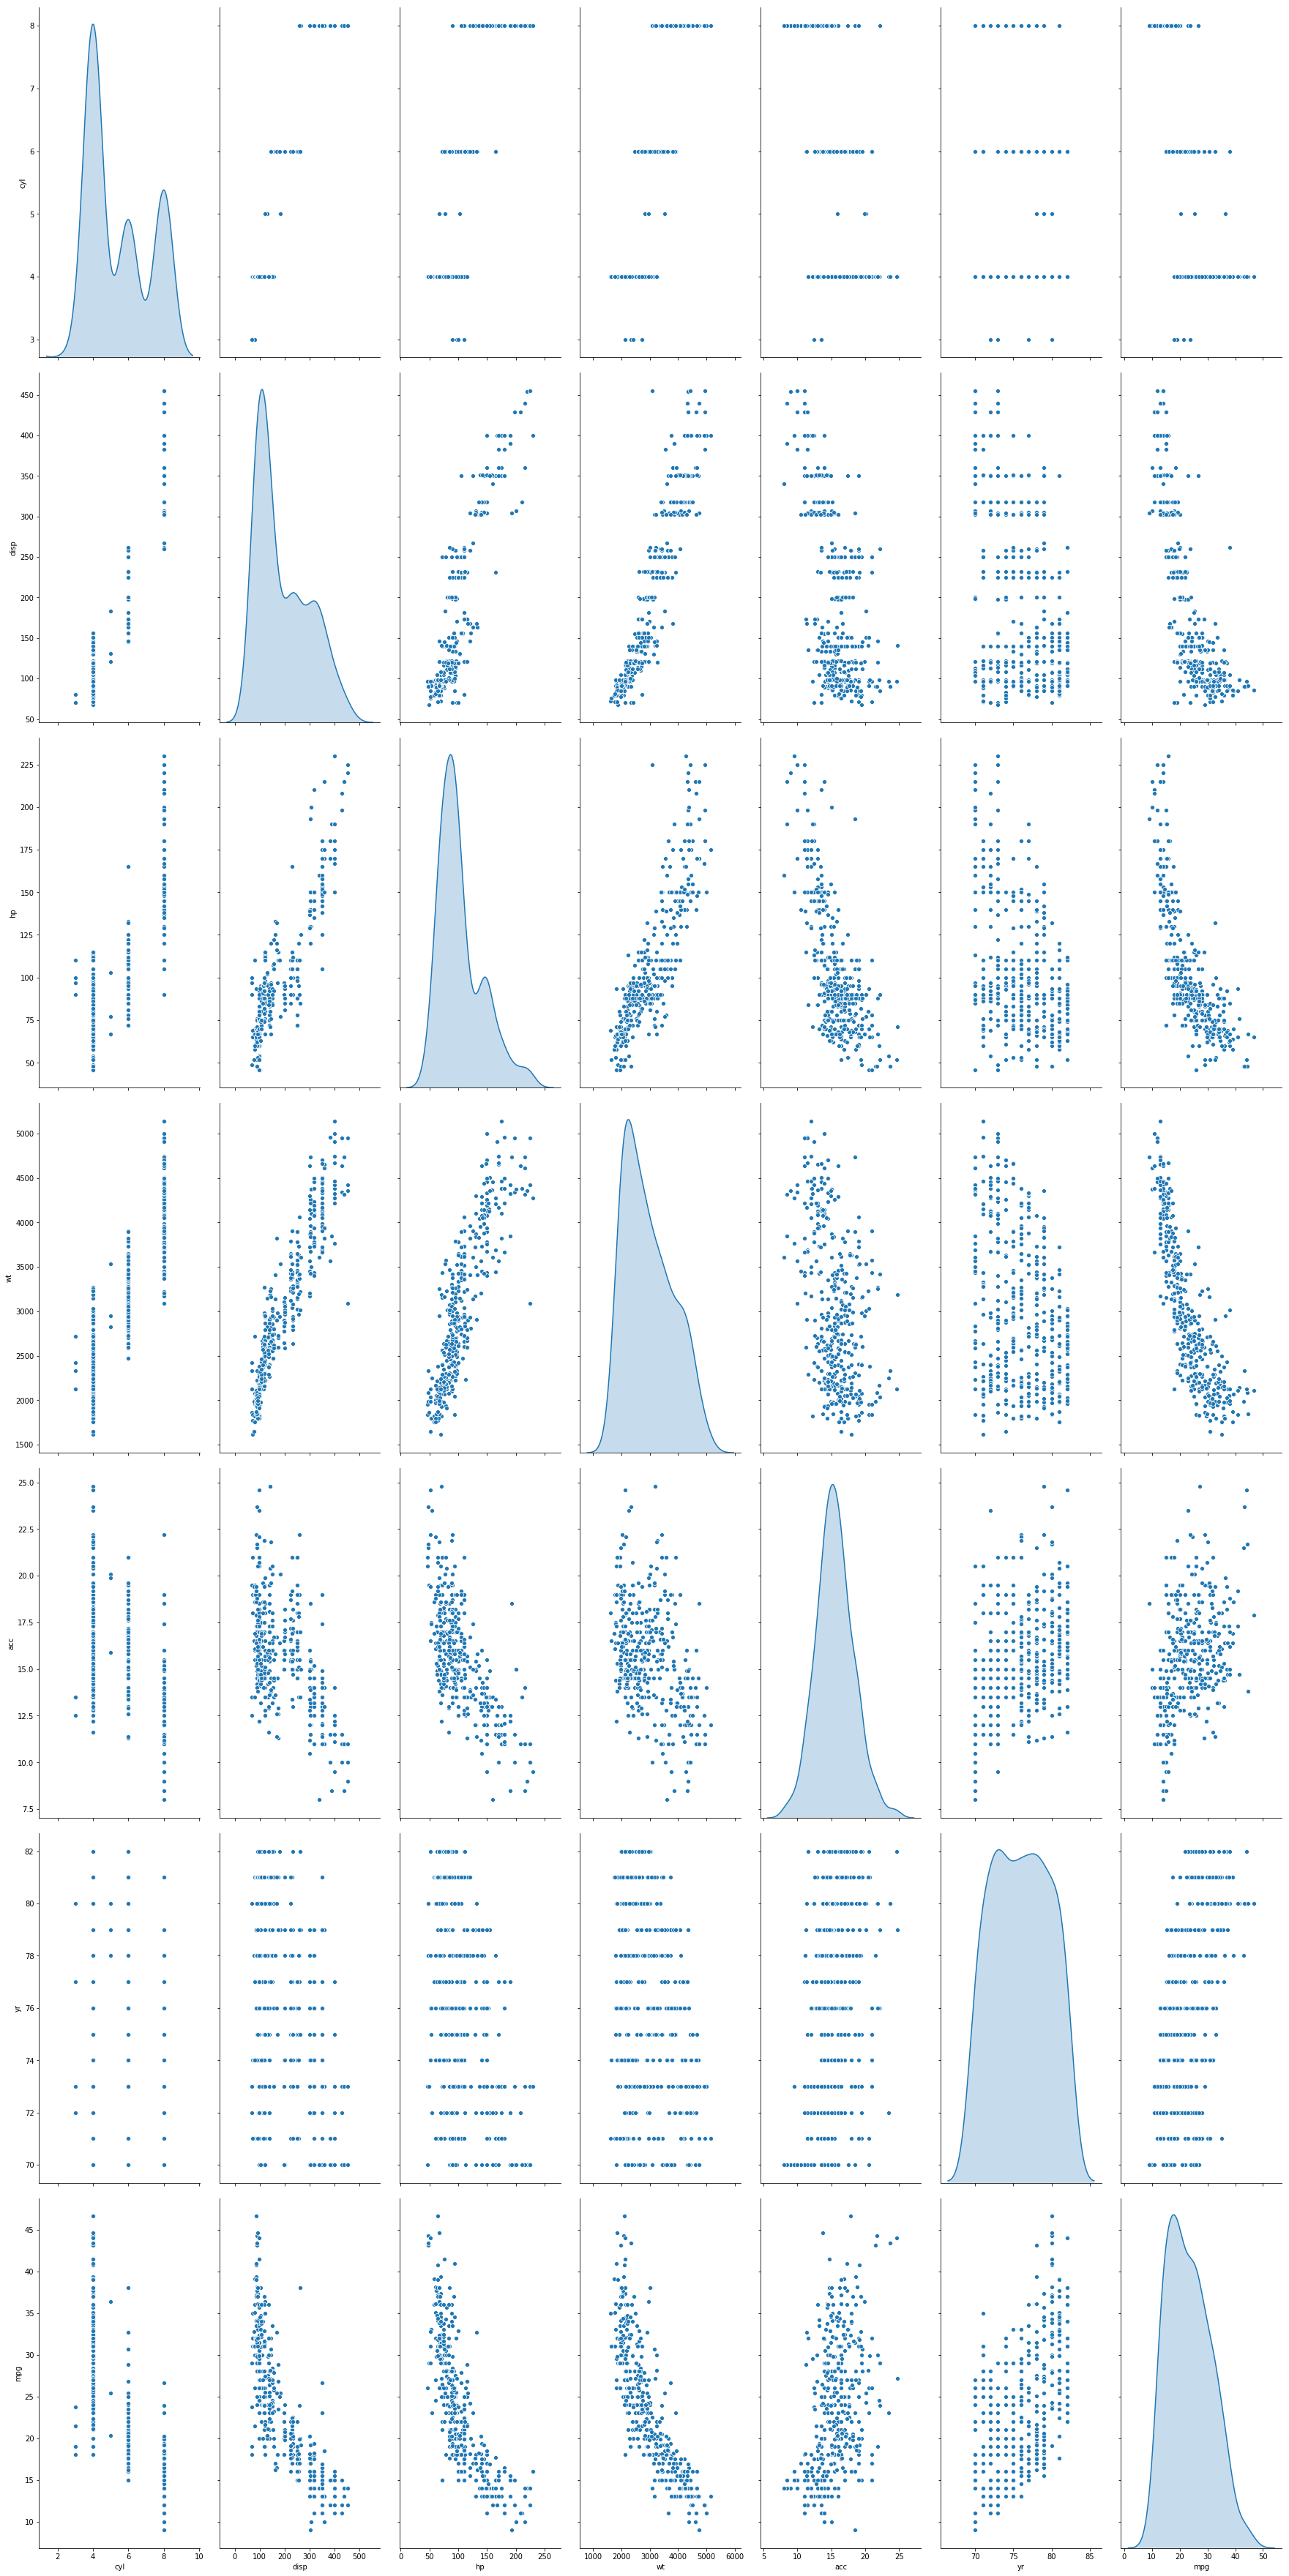

In [96]:

sns.pairplot(cardata_attr, size=7,aspect=0.5 , diag_kind='kde')


In [97]:
cardata_z = cardata.apply(zscore)

In [98]:
cluster_range = range( 2, 15)   # expect 3 to four clusters from the pair panel visual inspection 
cluster_errors = []
cluster_sil_scores = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init = 5)
  clusters.fit(cardata_z)
  labels = clusters.labels_                     # capture the cluster lables
  centroids = clusters.cluster_centers_         # capture the centroids
  cluster_errors.append( clusters.inertia_ )    # capture the inertia
  cluster_sil_scores.append(metrics.silhouette_score(cardata_z, labels, metric='euclidean'))

# combine the cluster_range and cluster_errors into a dataframe by combining them
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors , "Avg Sil Score": cluster_sil_scores } )
clusters_df[0:15]

,num_clusters,cluster_errors,Avg Sil Score
0,2,1294.841895,0.482359
1,3,946.019791,0.353148
2,4,738.392328,0.348449
3,5,665.524175,0.313971
4,6,595.953982,0.273115
5,7,545.262705,0.280428
6,8,496.485740,0.277159
7,9,453.936456,0.267941
8,10,422.881009,0.262507
9,11,400.746843,0.261166


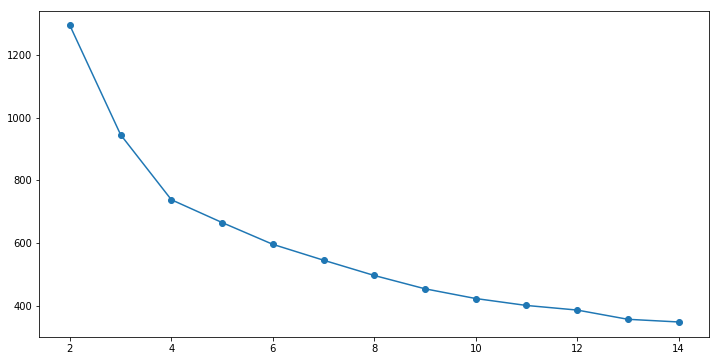

In [99]:
#Elbow method shows 4 could be a optimal cluster
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

Automatically created module for IPython interactive environment
For n_clusters = 2 The average silhouette_score is : 0.48235946103916116
For n_clusters = 3 The average silhouette_score is : 0.35314791198988205
For n_clusters = 4 The average silhouette_score is : 0.34844881731503
For n_clusters = 5 The average silhouette_score is : 0.31497575273047274
For n_clusters = 6 The average silhouette_score is : 0.2741945945851742
For n_clusters = 7 The average silhouette_score is : 0.2815503657786723
For n_clusters = 8 The average silhouette_score is : 0.2689667243667542
For n_clusters = 9 The average silhouette_score is : 0.27445642619809785
For n_clusters = 10 The average silhouette_score is : 0.2623385201136238


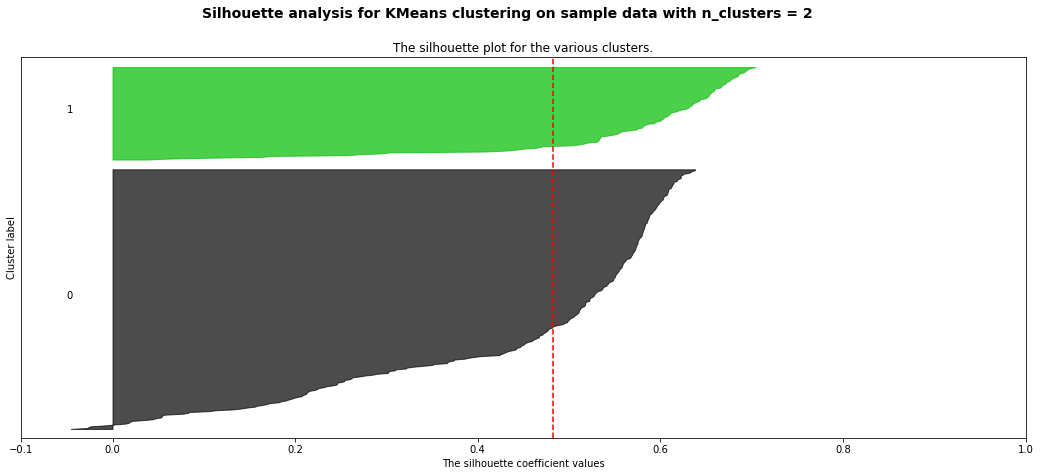

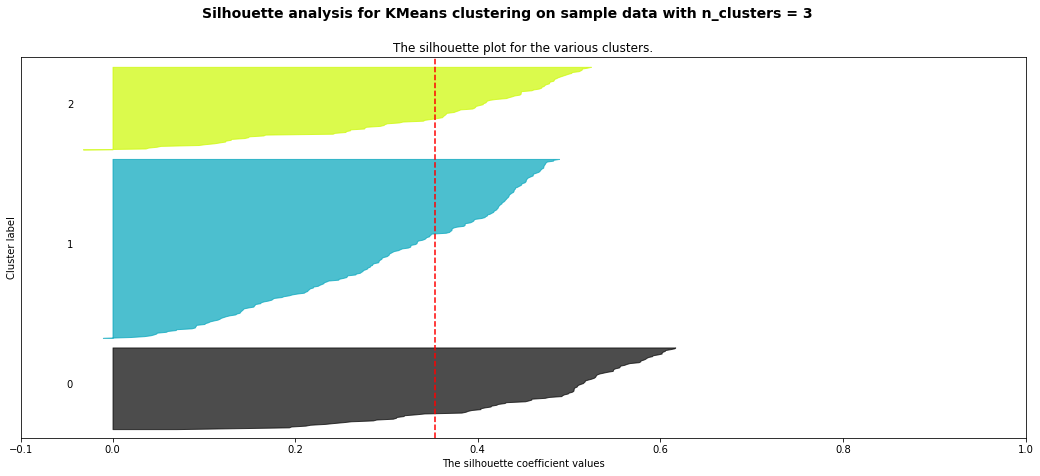

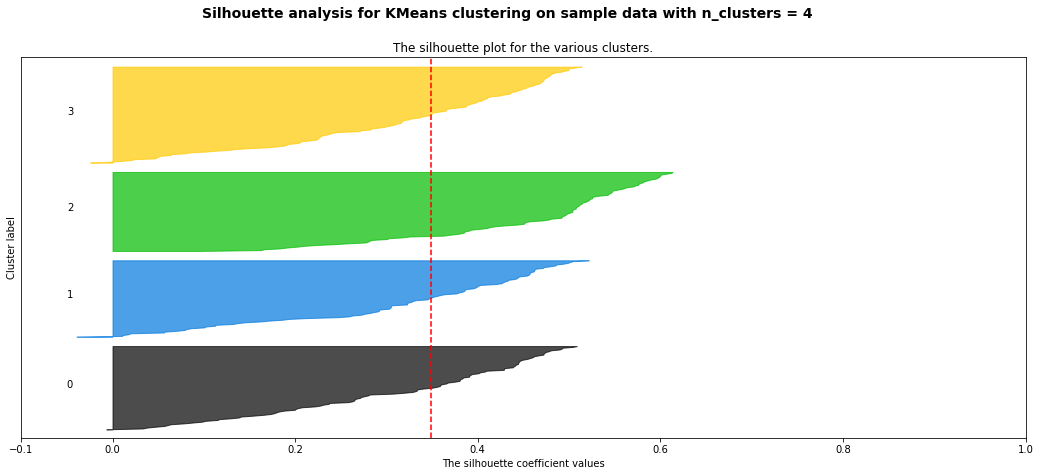

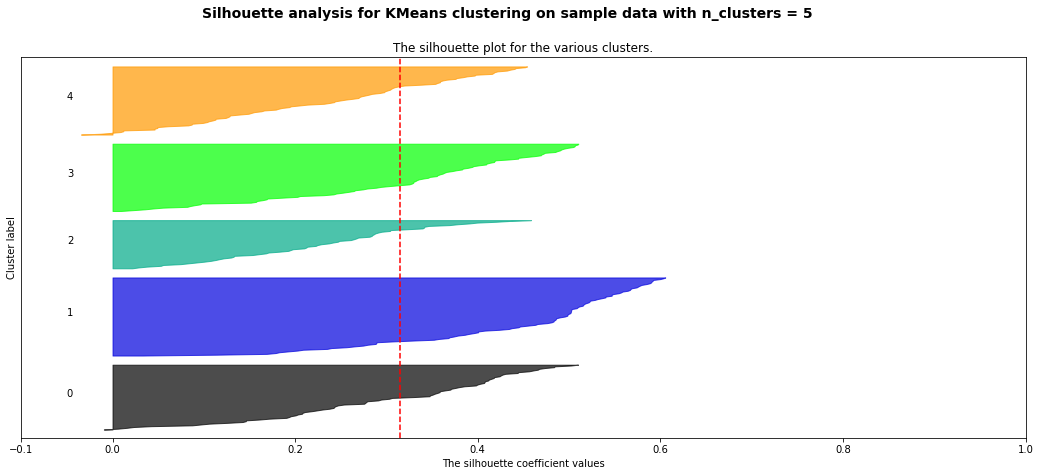

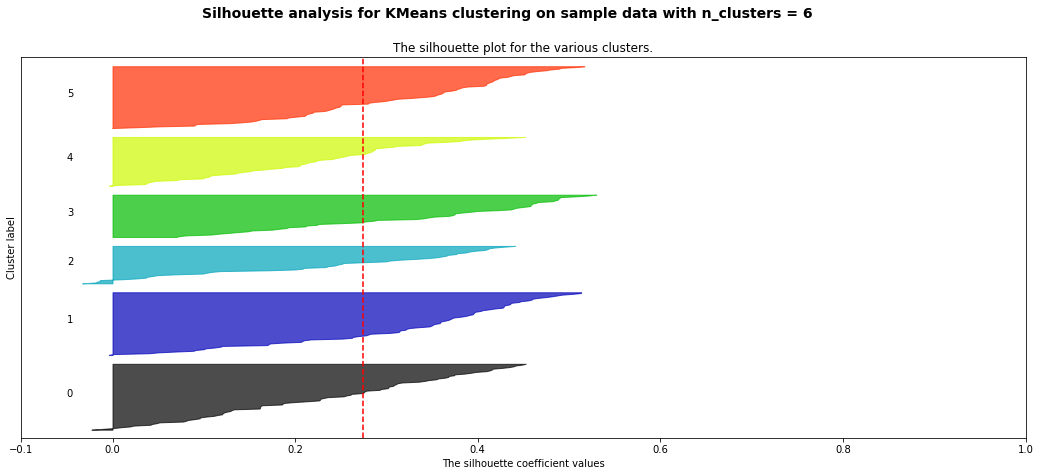

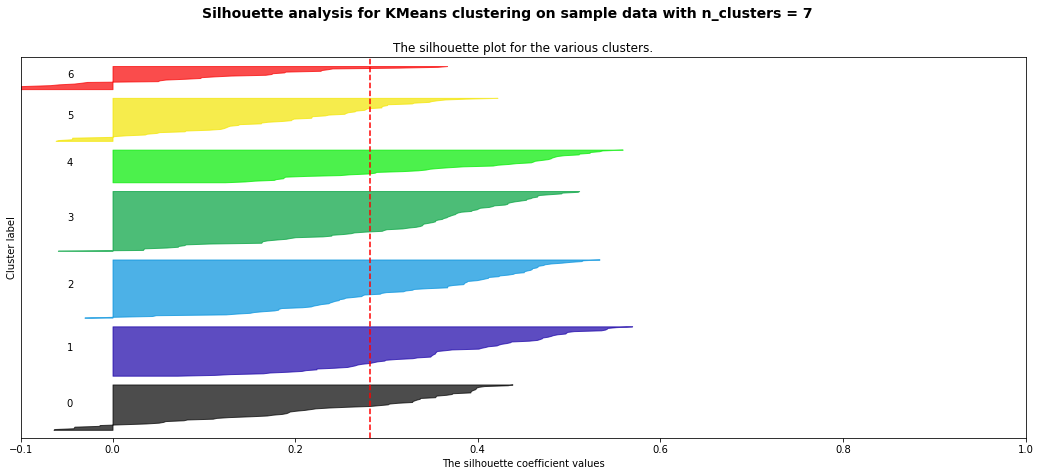

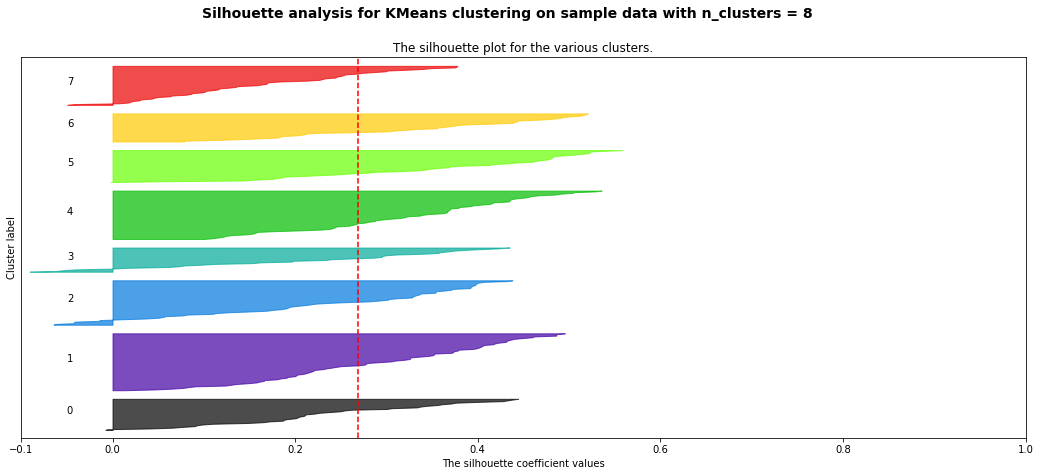

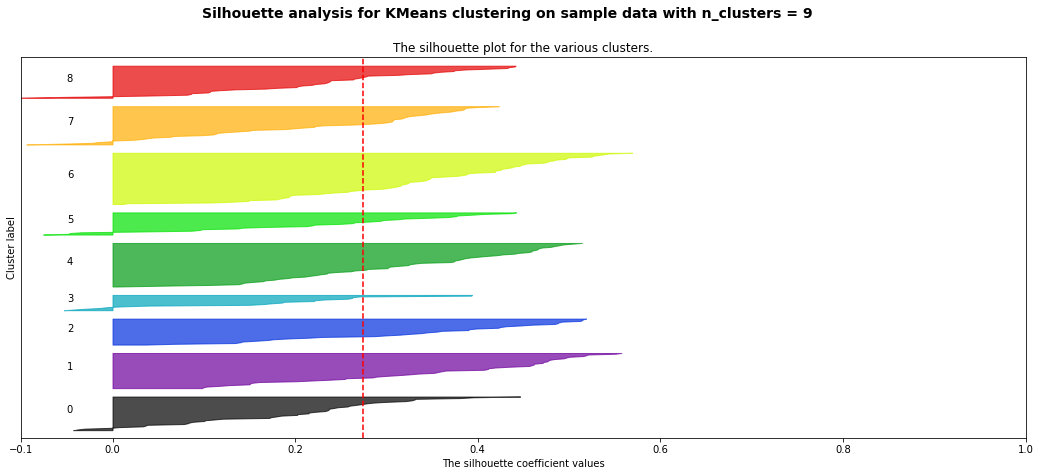

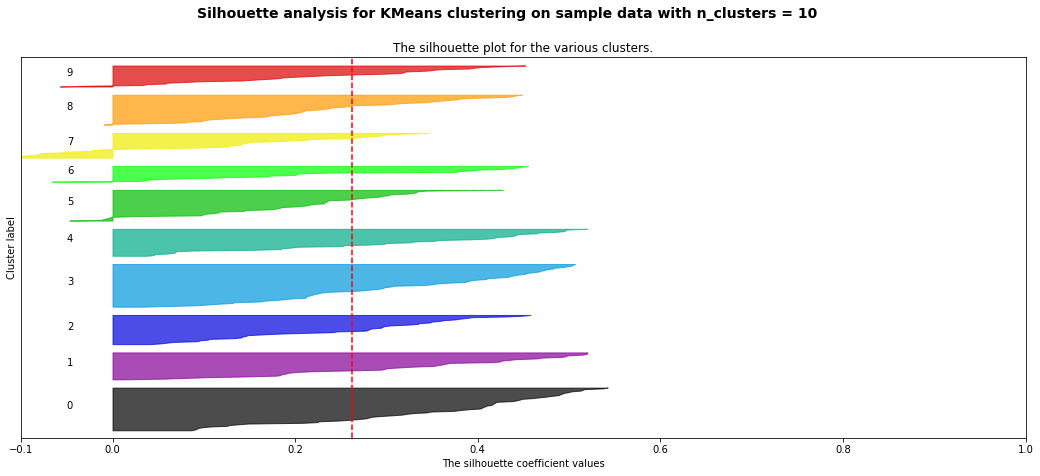

In [100]:

from __future__ import print_function

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

print(__doc__)

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
#X, y = make_blobs(n_samples=500,                  n_features=2,                  centers=4,
#                  cluster_std=1,                  center_box=(-10.0, 10.0),                  shuffle=True,
#                  random_state=1)  # For reproducibility

range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1) = plt.subplots(1)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(cardata_z) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(cardata_z)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(cardata_z, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(cardata_z, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    #colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    #ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
    #            c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    #ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
    #            c="white", alpha=1, s=200, edgecolor='k')

    #for i, c in enumerate(centers):
    #    ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
    #                s=50, edgecolor='k')

    #ax2.set_title("The visualization of the clustered data.")
    #ax2.set_xlabel("Feature space for the 1st feature")
    #ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()


#
#Silhoutte analysis shows:
#Cluster values - 2,3,4 - have the first 3 top average silhoutte score - so they are considered for first shortlist. 
#Sub clusters cross the avergage cluster silhoutte score for many of the cluster nos tested here. 
#Sub cluster plot thickness is even for when cluster no is 2 or 3 with relative spread even for cluster no 4. 
#Hence 4 clusters looks like a optimal value

In [101]:
# Number of clusters
kmeans = KMeans(n_clusters=4, random_state = 1 )
# Fitting the input data
kmeans = kmeans.fit(cardata_z)
# Getting the cluster labels
labels = kmeans.predict(cardata_z)
# Centroid values
centroids = kmeans.cluster_centers_

# Comparing with scikit-learn centroids
print("Centroid values")
print("sklearn")
print(centroids) # From sci-kit learn

cardata_z['labels'] = kmeans.labels_

print(cardata_z.groupby(["labels"]).count())
print(cardata_z.head())

Centroid values
sklearn
[[ 0.42443037  0.30530323 -0.03775766  0.33776539  0.29367006  0.03298635
  -0.49682681]
 [-0.82450284 -0.78042723 -0.74238037 -0.76525521  0.38447752  1.12432606
   1.19411648]
 [ 1.49819126  1.50392292  1.52168282  1.40409797 -1.0861486  -0.68832385
  -1.16379715]
 [-0.86209143 -0.80905811 -0.56076487 -0.76253463  0.32055871 -0.61862263
   0.21628669]]
        cyl  disp   hp   wt  acc   yr  mpg
labels                                    
0        91    91   91   91   91   91   91
1       111   111  111  111  111  111  111
2        94    94   94   94   94   94   94
3       102   102  102  102  102  102  102
        cyl      disp        hp        wt       acc        yr       mpg  \
0  1.498191  1.090604  0.673118  0.630870 -1.295498 -1.627426 -0.706439   
1  1.498191  1.503514  1.589958  0.854333 -1.477038 -1.627426 -1.090751   
2  1.498191  1.196232  1.197027  0.550470 -1.658577 -1.627426 -0.706439   
3  1.498191  1.061796  1.197027  0.546923 -1.295498 -1.627426

In [102]:
from sklearn.model_selection import train_test_split

In [103]:

print(cardata_z.groupby(["labels"]).count())
#print(cardata_z[labels==0].count())
#print(cardata_z[labels==0].iloc[:,:6])
#print(cardata_z[['labels']])
X_labels=cardata_z[['labels']]
X_labels
#cardata_z[X_labels].head()
X_label0 = cardata_z[labels==0].iloc[:,:6]
X_label1 = cardata_z[labels==1].iloc[:,:6]
X_label2 = cardata_z[labels==2].iloc[:,:6]
X_label3 = cardata_z[labels==3].iloc[:,:6]

#print(cardata_z[labels==0]['mpg'])
y_label0 = cardata_z[labels==0]['mpg']
y_label1 = cardata_z[labels==1]['mpg']
y_label2 = cardata_z[labels==2]['mpg']
y_label3 = cardata_z[labels==3]['mpg']


        cyl  disp   hp   wt  acc   yr  mpg
labels                                    
0        91    91   91   91   91   91   91
1       111   111  111  111  111  111  111
2        94    94   94   94   94   94   94
3       102   102  102  102  102  102  102


In [104]:
X_train_label0, X_test_label0, y_train_label0, y_test_label0 = train_test_split(X_label0, y_label0, test_size=0.25, random_state=1)
X_train_label1, X_test_label1, y_train_label1, y_test_label1 = train_test_split(X_label1, y_label1, test_size=0.25, random_state=1)
X_train_label2, X_test_label2, y_train_label2, y_test_label3 = train_test_split(X_label2, y_label2, test_size=0.25, random_state=1)
X_train_label3, X_test_label3, y_train_label3, y_test_label3 = train_test_split(X_label3, y_label3, test_size=0.25, random_state=1)

In [105]:
from sklearn.linear_model import LinearRegression
# invoke the LinearRegression function and find the bestfit model on training data
regression_model_label0 = LinearRegression()
regression_model_label0.fit(X_train_label0, y_train_label0)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [106]:
regression_model_label1 = LinearRegression()
regression_model_label1.fit(X_train_label1, y_train_label1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [107]:
regression_model_label2 = LinearRegression()
regression_model_label2.fit(X_train_label2, y_train_label2)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [108]:
regression_model_label3 = LinearRegression()
regression_model_label3.fit(X_train_label3, y_train_label3)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [109]:
# Let us explore the coefficients for each of the independent attributes

#for idx, col_name in enumerate(X_train_label0.columns):
#    print("The coefficient for cluster with label0 with {} is {}".format(col_name, regression_model_label0.coef_[0][idx]))
    

print("Coefficients by columns across models:")
for idx, col_name in enumerate(X_train_label0.columns):
    print("Cluster with label0: The coefficient for {} is {}".format(col_name, regression_model_label0.coef_[idx]))
    print("Cluster with label1: The coefficient for {} is {}".format(col_name, regression_model_label1.coef_[idx]))
    print("Cluster with label2: The coefficient for {} is {}".format(col_name, regression_model_label2.coef_[idx]))
    print("Cluster with label3: The coefficient for {} is {}".format(col_name, regression_model_label3.coef_[idx]))
    
print("\n\nCoefficients in each Model:") 
for idx, col_name in enumerate(X_train_label0.columns):
    print("Cluster with label1: The coefficient for {} is {}".format(col_name, regression_model_label0.coef_[idx]))
    
for idx, col_name in enumerate(X_train_label1.columns):
    print("Cluster with label1: The coefficient for {} is {}".format(col_name, regression_model_label1.coef_[idx]))
    
for idx, col_name in enumerate(X_train_label2.columns):
    print("Cluster with label2: The coefficient for {} is {}".format(col_name, regression_model_label2.coef_[idx]))
    
for idx, col_name in enumerate(X_train_label3.columns):
    print("Cluster with label3: The coefficient for {} is {}".format(col_name, regression_model_label3.coef_[idx]))

Coefficients by columns across models:
Cluster with label0: The coefficient for cyl is 0.19317975477282287
Cluster with label1: The coefficient for cyl is 0.9575504383571644
Cluster with label2: The coefficient for cyl is 0.36907246451515835
Cluster with label3: The coefficient for cyl is 0.5246476967888262
Cluster with label0: The coefficient for disp is -0.05260279338692173
Cluster with label1: The coefficient for disp is 0.02812414436991956
Cluster with label2: The coefficient for disp is -0.03109996106288853
Cluster with label3: The coefficient for disp is -0.5739909107317412
Cluster with label0: The coefficient for hp is -0.2270675429950851
Cluster with label1: The coefficient for hp is -0.23111701417849304
Cluster with label2: The coefficient for hp is -0.12671421989887924
Cluster with label3: The coefficient for hp is -0.19380422509194714
Cluster with label0: The coefficient for wt is -0.372474037878666
Cluster with label1: The coefficient for wt is -1.013178229030779
Cluster wi